## **Import Part**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow.keras import Model

### Create a Noisy Dataset

In [ ]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape = (len(x),), stddev=0.01)
  y= m*x + b + noise
  return x, y

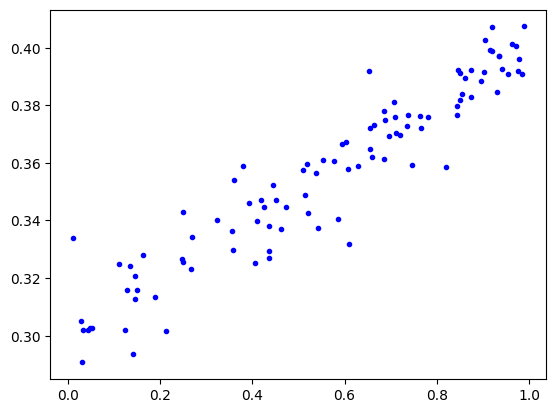

In [ ]:
x_train, y_train = make_noisy_data()

plt.plot(x_train, y_train, "b.")

### Define Variable for Model

In [ ]:
m = tf.Variable(0.)
b = tf.Variable(0.)

0.0 0.0


### Predict y given x

In [ ]:
def predict(x):
  y = m*x + b
  return y

### Loss Function

In [ ]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

### Calculate Loss before training

In [ ]:
loss = squared_error(predict(x_train), y_train)
print(loss.numpy())

0.12342333


### Use Gradient Descent

In [ ]:
learning_rate = 0.05
steps = 200

for i in range(steps):
  with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch([m,b])
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)

  gradients = tape.gradient(loss, [m, b])

  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)

  if i%20 == 0:
    print("step {0}: loss {1}".format(i, loss))

step 0: loss 0.12342333048582077
step 20: loss 0.0007737383712083101
step 40: loss 0.0001810179528547451
step 60: loss 0.00015519195585511625
step 80: loss 0.00013766824849881232
step 100: loss 0.0001244792656507343
step 120: loss 0.00011454594641691074
step 140: loss 0.00010706465400289744
step 160: loss 0.0001014301014947705
step 180: loss 9.718637738842517e-05


### Learned Values for m and b

In [ ]:
print("Best Parameters Values: m = %f and b = %f" %(m.numpy(), b.numpy()))

Best Parameters Values: m = 0.113650 and b = 0.293624


### Plot Best Line

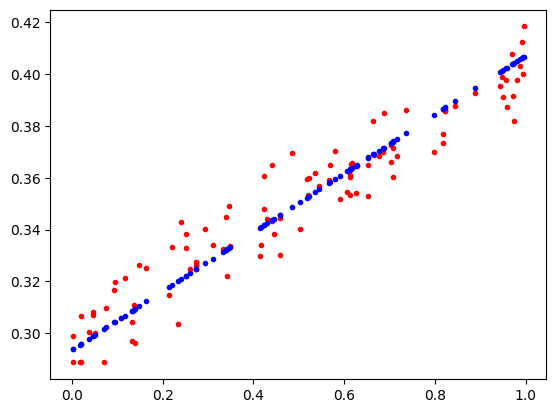

In [ ]:
plt.plot(x_train, y_train, "r.")
plt.plot(x_train, predict(x_train), "b.")